## Using torchvision for Semantic Segmentation

Now before we get started, we need to know about the inputs and outputs of these semantic segmentation models.<br/>
So, let's start!

These models expect a 3-channled image which is normalized with the Imagenet mean and standard deviation, i.e., <br/>
`mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]`

So, the input is `[Ni x Ci x Hi x Wi]`<br/>
where,
- `Ni` -> the batch size
- `Ci` -> the number of channels (which is 3)
- `Hi` -> the height of the image
- `Wi` -> the width of the image

And the output of the model is `[No x Co x Ho x Wo]`<br/>
where,
- `No` -> is the batch size (same as `Ni`)
- `Co` -> **is the number of classes that the dataset have!**
- `Ho` -> the height of the image (which is the same as `Hi` in almost all cases)
- `Wo` -> the width of the image (which is the same as `Wi` in almost all cases)

Alright! And just one more thing!
The `torchvision` models outputs an `OrderedDict` and not a `torch.Tensor` <br/>
And in `.eval()` mode it just has one key `out` and thus to get the output we need to get the value
stored in that `key`.

The `out` key of this `OrderedDict` is the key that holds the output. <br/>
So, this `out` key's value has the shape of `[No x Co x Ho x Wo]`.

Now! we are ready to play :)

### DeepLabv3

In [ ]:
from torchvision import models
import numpy as np
import cv2

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

2020-10-14 16:47:32 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


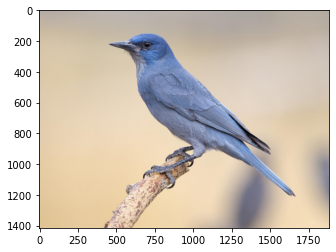

In [ ]:
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

In [ ]:
#Preprocess ....Normalize and resize to desired dimensions
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [ ]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


In [ ]:
#hector.png image
!gdown https://drive.google.com/uc?id=1lNRiB35LqyK7b5kUBCnIjje89rMFPBBO

#person.png image
!gdown https://drive.google.com/uc?id=1GSzaq393WGGnww9wJbklt6M-ZoCYBBlv

#threshold.png image
!gdown https://drive.google.com/uc?id=1Ztx-mJZFfnmrfgQZB4ySQtT6e24h7Oo5

#js.png image
!gdown https://drive.google.com/uc?id=1uAsB3fJpa3dQ8uryBIHSp2_9qK5k9ak9

Downloading...
From: https://drive.google.com/uc?id=1lNRiB35LqyK7b5kUBCnIjje89rMFPBBO
To: /content/hector.png
100% 261k/261k [00:00<00:00, 82.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GSzaq393WGGnww9wJbklt6M-ZoCYBBlv
To: /content/person.png
22.9MB [00:00, 86.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ztx-mJZFfnmrfgQZB4ySQtT6e24h7Oo5
To: /content/threshold.png
100% 8.25k/8.25k [00:00<00:00, 14.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uAsB3fJpa3dQ8uryBIHSp2_9qK5k9ak9
To: /content/js.png
100% 67.0k/67.0k [00:00<00:00, 24.1MB/s]


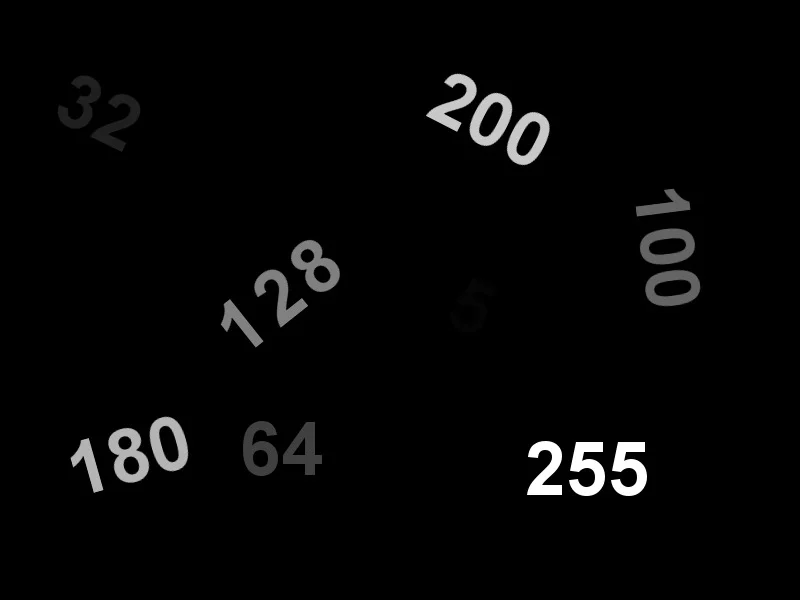

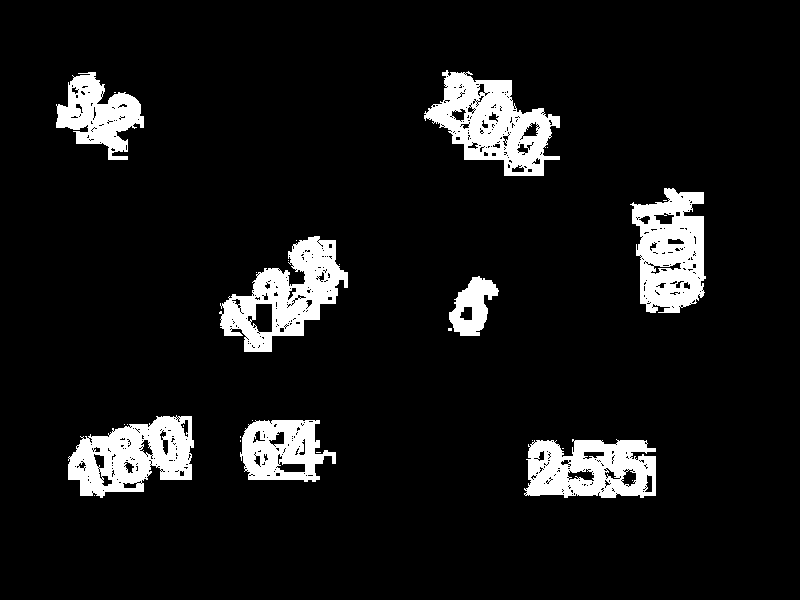

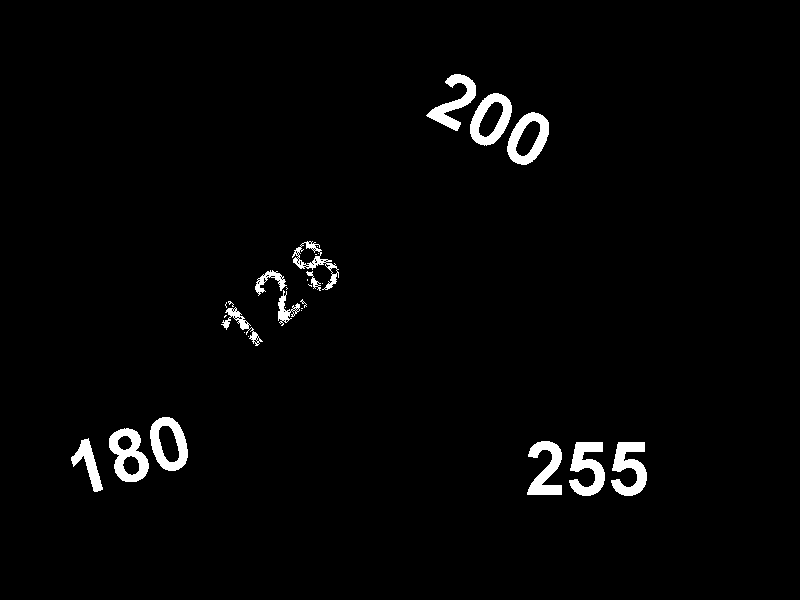

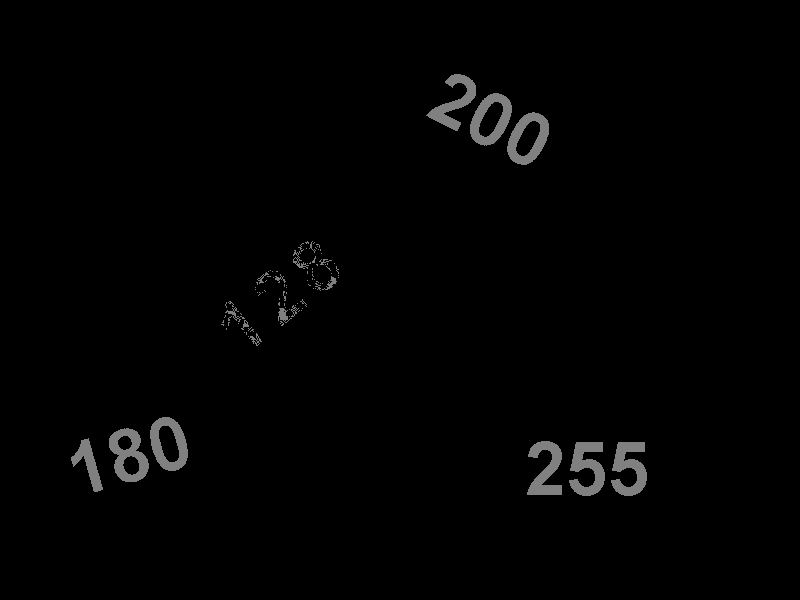

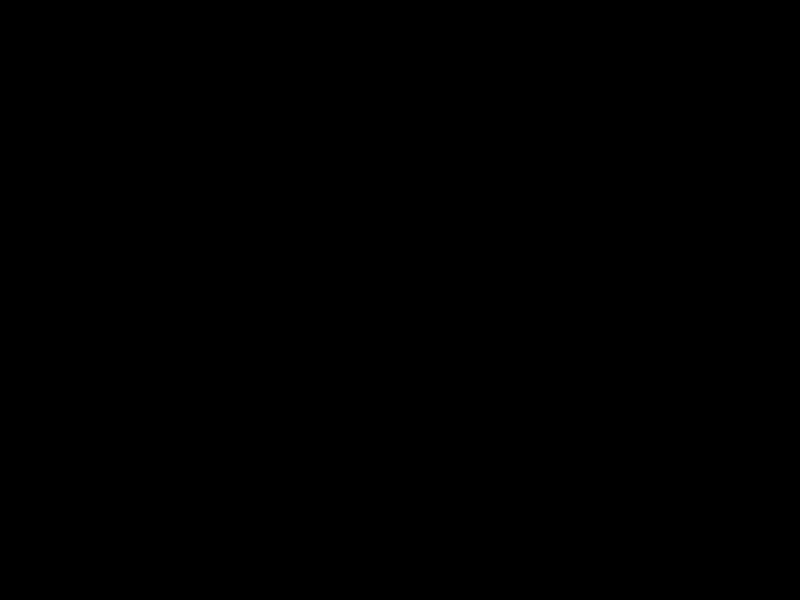

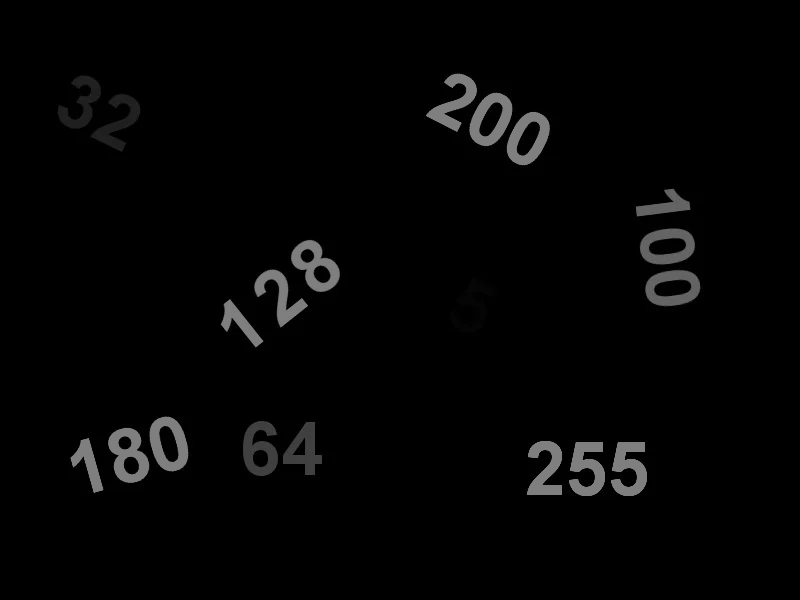

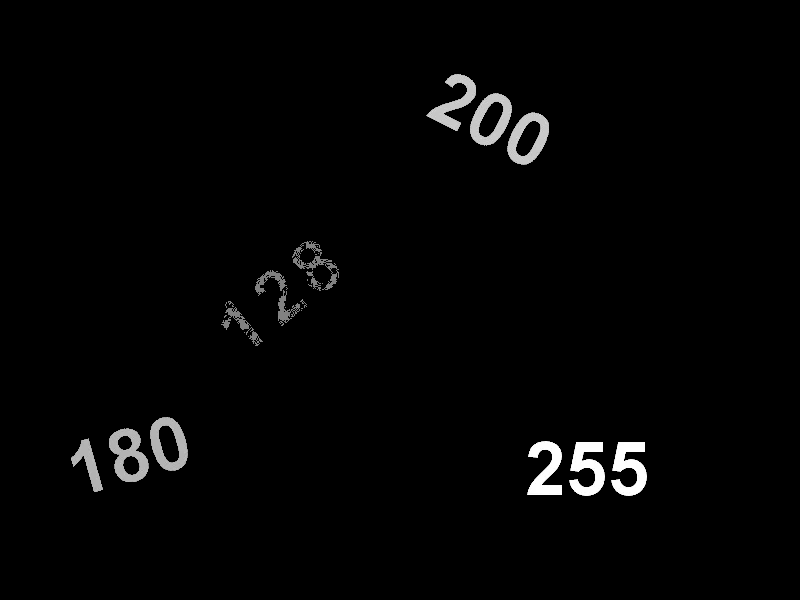

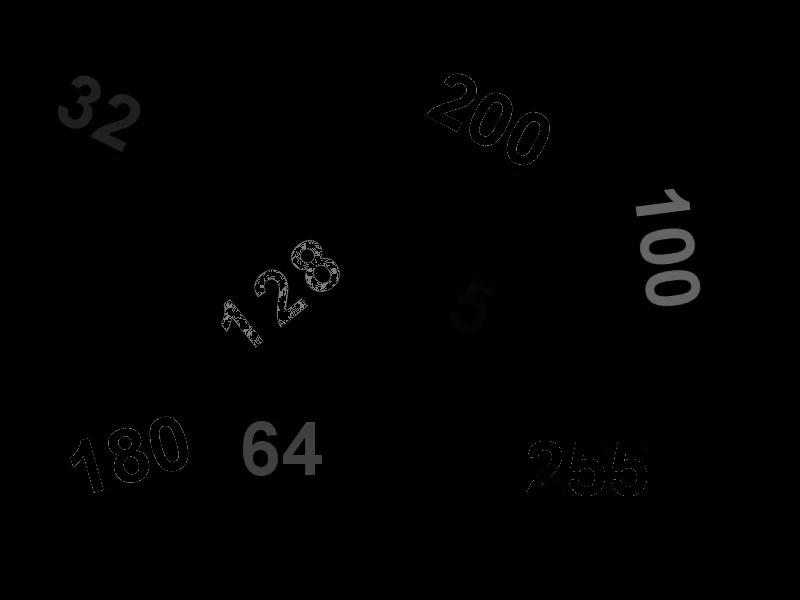

In [ ]:
#Threshold Testing 0 - 255 gray value
import cv2
from google.colab.patches import cv2_imshow
# Read image
src = cv2.imread("./threshold.png", cv2.IMREAD_GRAYSCALE)

#Show Image
cv2_imshow(src)

#Values
thresh = 0
max_value = 255

#BINARY
#if src(x,y) > thresh,   then img(x,y) = tresh_max_value
th, dst = cv2.threshold(src, thresh, max_value, cv2.THRESH_BINARY);
th2, dst2 = cv2.threshold(src, 127, max_value, cv2.THRESH_BINARY);
th3, dst3 = cv2.threshold(src, 128, 128, cv2.THRESH_BINARY);

#INVERSE BINARY
#if src(x,y) > thresh then dst(x,y)= 0 else dst(x,y)= maxValue
th4, dst4 = cv2.threshold(src, 127, 0, cv2.THRESH_BINARY_INV)


#Truncate Thresholding
#if src(x,y) > thresh then dst(x,y) = thresh else dst(x,y) = src(x, y)
#Max value is ignored
th5, dst5= cv2.threshold(src, thresh + 127, max_value, cv2.THRESH_TRUNC)

#Threshold to Zero
# if src(x,y) > thresh then dst(x,y) = thresh else dst(x,y) = 0
th6, dst6 = cv2.threshold(src, thresh + 127, max_value, cv2.THRESH_TOZERO)

#Inverted Threshold to Zero  
#if src(x, y) > thresh then dst(x, y) = 0 else dst(x,y) = src(x,y)
th7, dst7 = cv2.threshold(src, thresh + 127 , max_value, cv2.THRESH_TOZERO_INV)

#Show Result
cv2_imshow(dst)
cv2_imshow(dst2)
cv2_imshow(dst3)

cv2_imshow(dst4)
cv2_imshow(dst5)
cv2_imshow(dst6)
cv2_imshow(dst7)

In [ ]:
#Segment function
def segment(net, path, show_orig=True, dev='cuda', virtual=False, blur = False, virtualBlur=False):
  img = Image.open(path)
  if show_orig: 
    plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(450), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out'] # [1,21,ho,wo]
  #om... [1,ho,wo]
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  print('esto es om lo de la prediction')
  cv2_imshow(om)

  if virtual:
    rgb = decode_segmap_virtual_background(om, path)
  elif virtualBlur:
    rgb = decode_segmap_virtual_background_blur(om, path)
  elif blur:
    rgb = decode_segmap_blur_background(om, path)
  else:
    rgb = decode_segmap(om, path)
  
  plt.imshow(rgb); plt.axis('off'); plt.show()

In [ ]:
#Alpha Bending with White Background
#Make Image into RGB

#Source is original image
#Image is the prediction result --> Prediction [1, 21, ho, wo] to [ho, wo], Original_Image  
def decode_segmap(image, source, nc=21):

  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  
  #Unit-8 Empty array [r0 g0 b0 a0 ...r1 g1 b1 a1]
  #Zero Array de tamano Image...Prediction
  #llenamos todo de negro y pintamos los otros pixeles de cualquier color
  r = np.zeros_like(image).astype(np.uint8)
  print('esto es R')
  print(r.shape)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

  #Llenar el array 
  for l in range(0, nc):
    idx = image == l
    if (l == 15):#Solo Queremos las Personas
      print(idx)
      # es un arrat de false y true 
      #donde sea true supongo que metera el resultado.....
      r[idx] = label_colors[l, 0]
      g[idx] = label_colors[l, 1]
      b[idx] = label_colors[l, 2]
  
  #Es la Imagen pintada
  #pegando todo los unit8 arrays en R*G*A
  rgb = np.stack([r, g, b], axis=2)
  print('esto es RGB')
  cv2_imshow(rgb)
  # Load the foreground input image 
  #Leemos la Imagen Original
  foreground = cv2.imread(source)

  # Change the color of foreground image to RGB 
  # and resize image to match shape of R-band in RGB output map
  #aseguramos que este en RGB
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  
  #Resize foreground to R for Alpha Bending
  foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))
  cv2_imshow(foreground)

  # Create a background array to hold white pixels
  # with the same size as RGB output map
  background = 255 * np.ones_like(rgb).astype(np.uint8)

  # Convert uint8 to float......
  foreground = foreground.astype(float)
  background = background.astype(float)
  
  # Create a binary mask of the RGB output map using the threshold value 0
  th, alpha = cv2.threshold(np.array(rgb), 0, 255, cv2.THRESH_BINARY)
  print('Mask sin Blur')
  cv2_imshow(alpha)

  # Apply a slight blur to the mask to soften edges
  alpha = cv2.GaussianBlur(alpha, (7,7),0)
  print('Mask con Blur')
  cv2_imshow(alpha)

  kernel = np.ones((5,5), np.uint8)
  #Erosion of mask
  #quita los puntos blancos no deseados e objectos conectados
  img_erosion = cv2.erode(alpha, kernel, iterations=1)
  print('imagen erosionada')
  cv2_imshow(img_erosion)

  #Dilatation of mask To try to get Tri-map
  img_dilation = cv2.dilate(alpha, kernel, iterations=1) 
  print('Esto es es la imagen dilata')
  cv2_imshow(img_dilation)

  #Erosion + Dilation
  img_erosion = cv2.erode(alpha, kernel, iterations=1) 
  img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
  print('Erosion + Dilation')
  cv2_imshow(img_dilation)

  # Normalize the alpha mask to keep intensity between 0 and 1
  #Normalizamos la mascara entre 0-1 ya blureada
  alpha = alpha.astype(float)/255

  #Hacemos el ALPHA Bending
  #Operacion de Matrices
  # alpha = F*alpha + B*(1-alpha)
  # Multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)  
  plt.title('foreground')
  plt.imshow(foreground)
  plt.show()
  # Multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, background)  
  plt.title('background')
  plt.imshow(background)
  plt.show()
  # Add the masked foreground and background
  outImage = cv2.add(foreground, background)

  plt.title('result')
  plt.imshow(outImage/255)
  plt.show()
  # Return a normalized output image for display
  return outImage/255





In [ ]:
#Blur Real Background
def decode_segmap_blur_background(image, source):
  #primer paso sacar rgb para llenarlo despues
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  label_colors = np.array([ (192, 128, 128)])

  #Image es un array donde lo pixeles van a estar entre 0 - 21
  #esto se debe que la salida del modelo es [1*nc*ho*wo]
  #y sacamos el maximo que cada pixel al final con argmax
  # la idea es ponerle un color solo a los que sean #15 persona
  idx = image == 15

  r[idx] = label_colors[0][0]
  g[idx] = label_colors[0][1]
  b[idx] = label_colors[0][2]

  rgb = np.stack([r,g,b], axis=2 )


  #ahora leemos el foreground
  foreground = cv2.imread('./hector.png')
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))
  foreground = foreground.astype(float)

  #leemos el background
  background = cv2.imread('./hector.png')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  background = cv2.resize(background,(r.shape[1],r.shape[0]))
  background = background.astype(float)

  #hacemos blur al background
  background = cv2.GaussianBlur(background,(15, 15),0)# la podemos hacer con la propiedad de filter de los canva.s.. tambien
  background = cv2.blur(background, (30, 30), cv2.BORDER_DEFAULT)
  
  #Alpha Matting - Bending
  alpha = th, alpha = cv2.threshold(np.array(rgb), 0, 255, cv2.THRESH_BINARY)
  
  #Dilatation-erosion-blur on mask
  kernel = np.ones((5,5), np.uint8)
  img_erosion = cv2.erode(alpha, kernel, iterations=1) 
  alpha = cv2.dilate(img_erosion, kernel, iterations=1)
  alpha = cv2.GaussianBlur(alpha,(9, 9),0)#soften edges=smotthing

  #Normalize alpha and pass it to decimal...
  alpha = alpha.astype(float)/255

  #Operaciones
  foreground = cv2.multiply(alpha, foreground)
  background = cv2.multiply(1.0 - alpha, background)

  outImage = cv2.add(foreground, background)

  return outImage/255
  

In [ ]:
#blur virtual background
def decode_segmap_virtual_background_blur(image, source):
  #primer paso sacar rgb para llenarlo despues
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  label_colors = np.array([ (192, 128, 128)])

  #Image es un array donde lo pixeles van a estar entre 0 - 21
  #esto se debe que la salida del modelo es [1*nc*ho*wo]
  #y sacamos el maximo que cada pixel al final con argmax
  # la idea es ponerle un color solo a los que sean #15 persona
  idx = image == 15

  r[idx] = label_colors[0][0]
  g[idx] = label_colors[0][1]
  b[idx] = label_colors[0][2]

  rgb = np.stack([r,g,b], axis=2 )



  #ahora leemos el foreground
  foreground = cv2.imread('./hector.png')
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))
  foreground = foreground.astype(float)

  #leemos el background
  background = cv2.imread('./js.png')
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  background = cv2.resize(background,(r.shape[1],r.shape[0]))
  background = background.astype(float)

  #hacemos blur al background
  background = cv2.GaussianBlur(background,(15, 15),0)# la podemos hacer con la propiedad de filter de los canva.s.. tambien
  

  #Alpha Matting - Bending
  alpha = th, alpha = cv2.threshold(np.array(rgb), 0, 255, cv2.THRESH_BINARY)
  
  #Dilatation-erosion-blur
  kernel = np.ones((5,5), np.uint8)
  img_erosion = cv2.erode(alpha, kernel, iterations=1) 
  alpha = cv2.dilate(img_erosion, kernel, iterations=1)
  alpha = cv2.GaussianBlur(alpha,(9, 9),0)#soften edges=smotthing

  #Normalize alpha and pass it to decimal...
  alpha = alpha.astype(float)/255

  #Operaciones
  foreground = cv2.multiply(alpha, foreground)
  background = cv2.multiply(1.0 - alpha, background)

  outImage = cv2.add(foreground, background)

  return outImage/255

In [ ]:
#Replace with virtual Background
def decode_segmap_virtual_background(image, source):

  #Primero el array unit8 negro para rgb de las dimensiones Image
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  print(image == 15)
  idx = image == 15
  print(idx)
  # es un arrat de false y true 
  #donde sea true supongo que metera el resultado.....
  r[idx] = label_colors[15, 0]
  g[idx] = label_colors[15, 1]
  b[idx] = label_colors[15, 2]
  rgb = np.stack( [r, g, b], axis=2)
  print('esto es en rgb virtual')
  cv2_imshow(rgb)
  #rgb es alpha


  #Cargamos el foreground
  foreground = cv2.imread(source)

  # Change the color of foreground image to RGB 
  # and resize image to match shape of R-band in RGB output map
  #aseguramos que este en RGB
  #foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  
  #Resize foreground to R for Alpha Bending
  foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
  foreground = cv2.resize(foreground,(r.shape[1],r.shape[0]))
  cv2_imshow(foreground)


  #ahora cargamos el background y hacemos resize
  bg = cv2.imread('./js.png')
  #Aseguramos que este formato RGB
  bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
  bg = cv2.resize(bg,(r.shape[1],r.shape[0]))
  cv2_imshow(bg)

  #de todas formas en opencv ya es ndarray
  #Pasamos la imagen a un nparray ndarry de unit8 type
  
  foreground = foreground.astype(float)
  bg = bg.astype(float)



  #Alpha Bending
  #mayor que cero les poner 255 osea blanco
  th, alpha = cv2.threshold(np.array(rgb), 0, 255, cv2.THRESH_BINARY)
  print('Mask sin Blur')
  cv2_imshow(alpha)

  #Blur
  alpha = cv2.GaussianBlur(alpha,(9, 9),0)
  print('Mask con Blur')
  cv2_imshow(alpha)


  kernel = np.ones((5,5), np.uint8)

  #Erosion + Dilation
  img_erosion = cv2.erode(alpha, kernel, iterations=1) 
  img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
  print('Erosion + Dilation')
  cv2_imshow(img_dilation)

  print('alpha')
  #Normalize to keep values beetween 0 - 1
  alpha = alpha.astype(float)/255
  cv2_imshow(alpha)


  #Hacemos el ALPHA Bending
  #Operacion de Matrices
  # alpha = F*alpha + B*(1-alpha)
  # Multiply the foreground with the alpha matte
  foreground = cv2.multiply(alpha, foreground)  

  # Multiply the background with ( 1 - alpha )
  background = cv2.multiply(1.0 - alpha, bg)  

  # Add the masked foreground and background
  outImage = cv2.add(foreground, background)
  
  # Return a normalized output image for display
  return outImage/255
  

Alright! Now we have god-level segmentation model!<br/>
Let's see how we perform with the same image on this model!

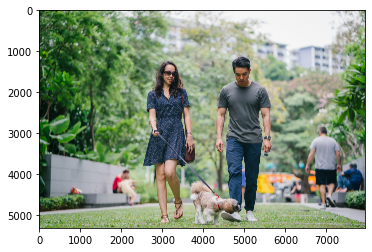

Segmenatation Image on DeepLabv3


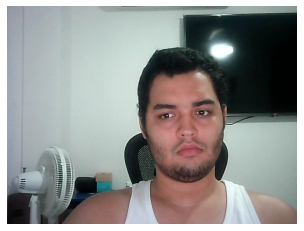

esto es om lo de la prediction


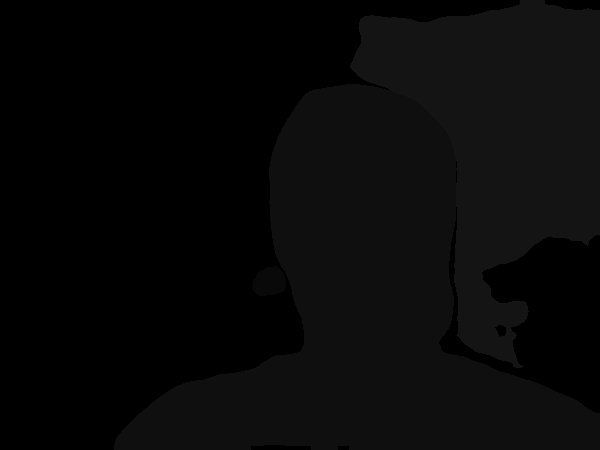

esto es R
(450, 600)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
esto es RGB


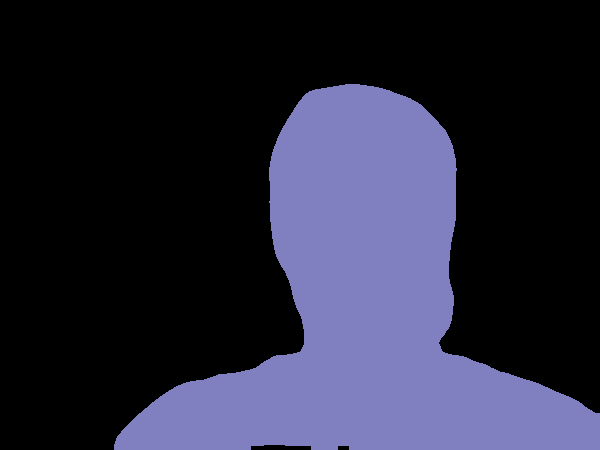

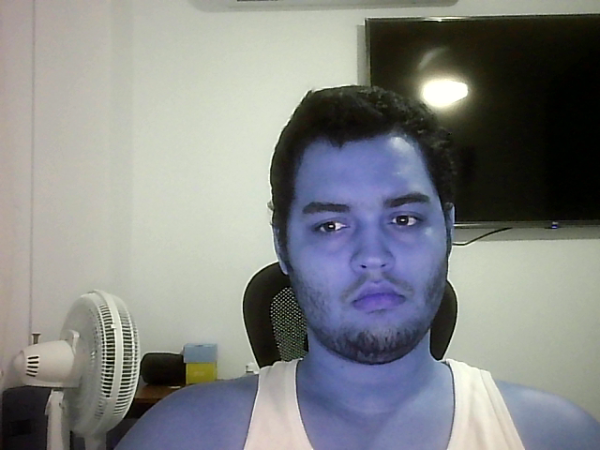

Mask sin Blur


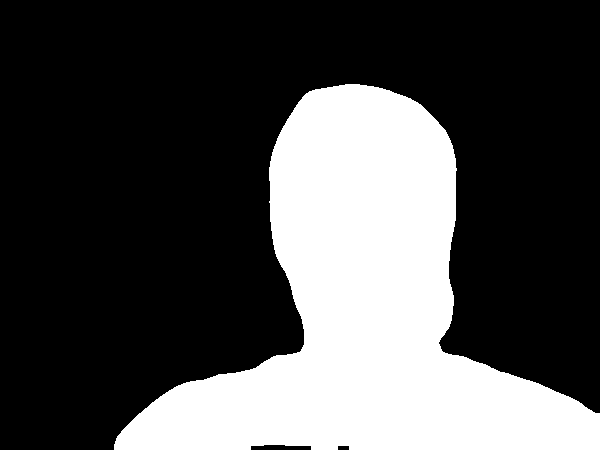

Mask con Blur


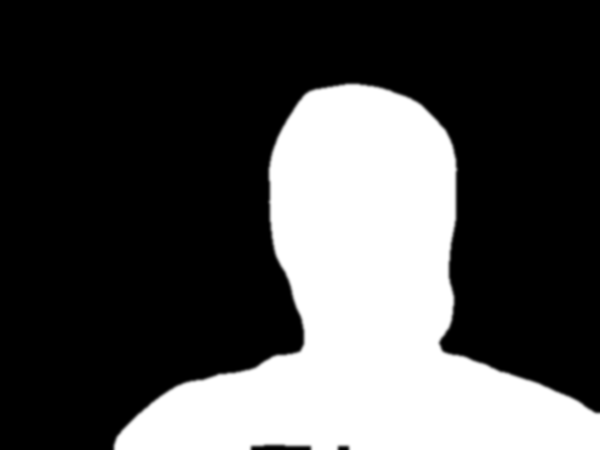

imagen erosionada


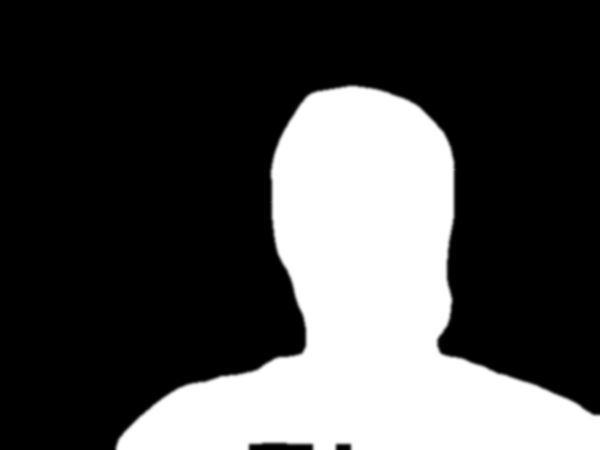

Esto es es la imagen dilata


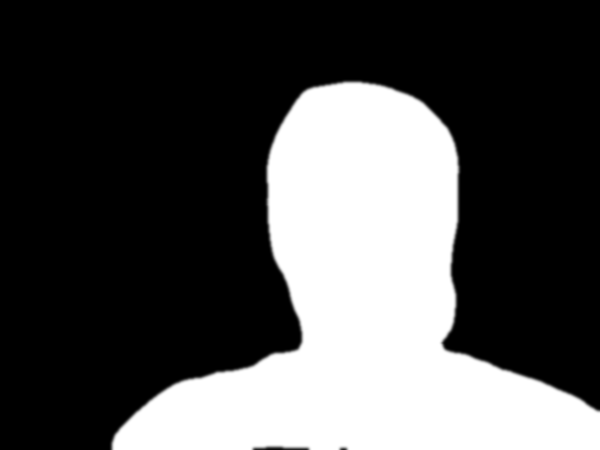

Erosion + Dilation


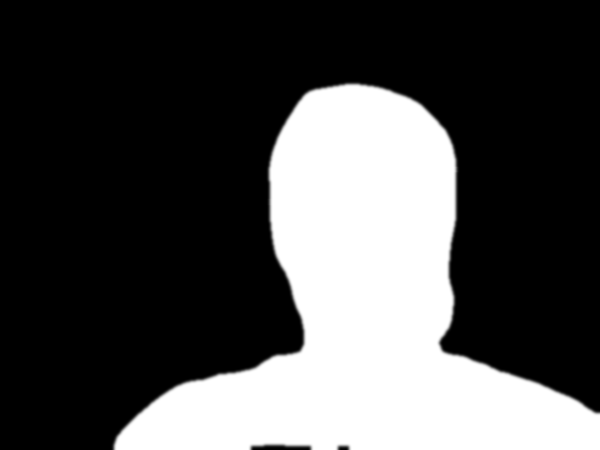

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


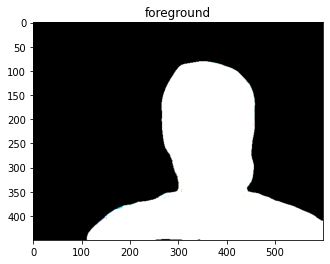

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


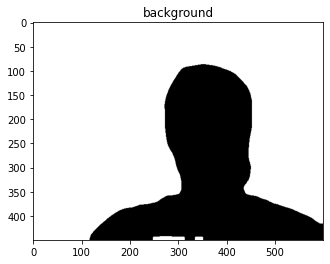

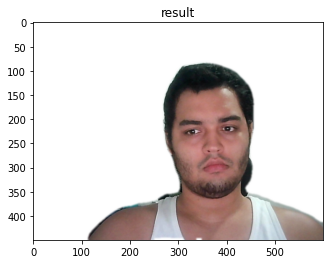

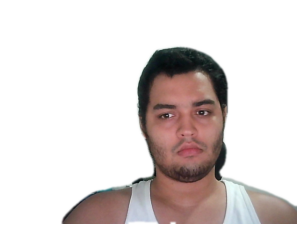

In [ ]:
img = Image.open('./person.png')
plt.imshow(img); plt.show()

print ('Segmenatation Image on DeepLabv3')
segment(dlab, './hector.png', show_orig=True) 

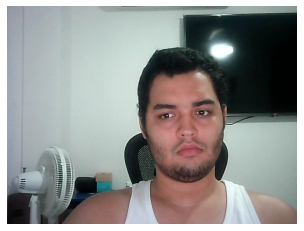

esto es om lo de la prediction


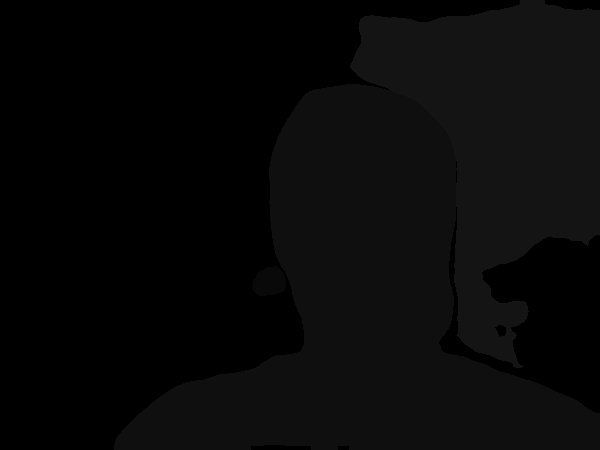

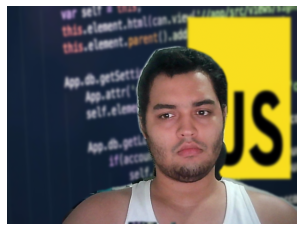

In [ ]:
#Blur Background Virtual
segment(dlab, './hector.png', show_orig=True, virtual=False, virtualBlur=True )

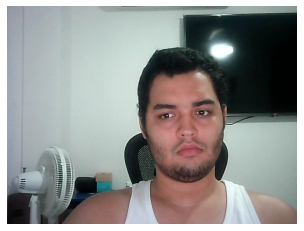

esto es om lo de la prediction


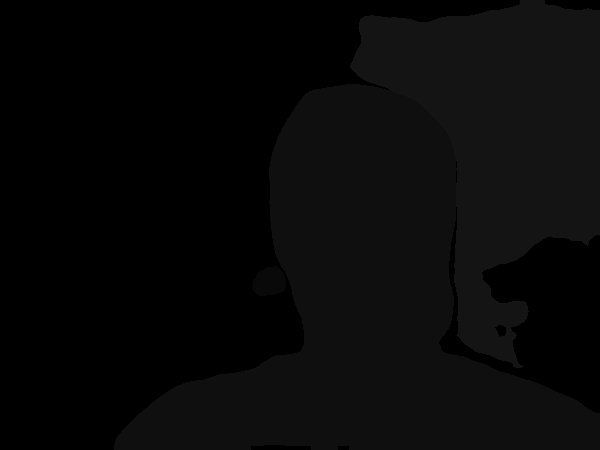

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
esto es en rgb virtual


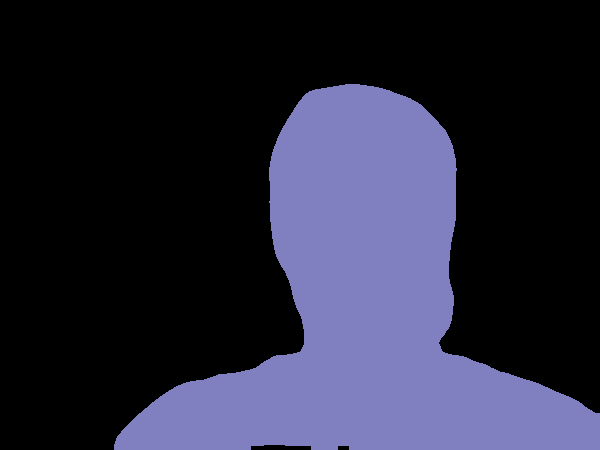

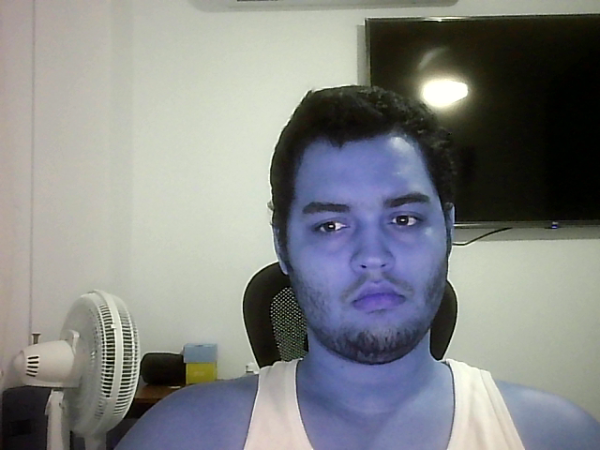

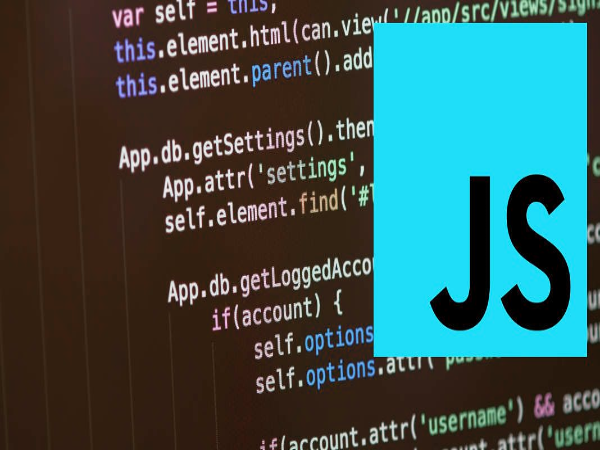

Mask sin Blur


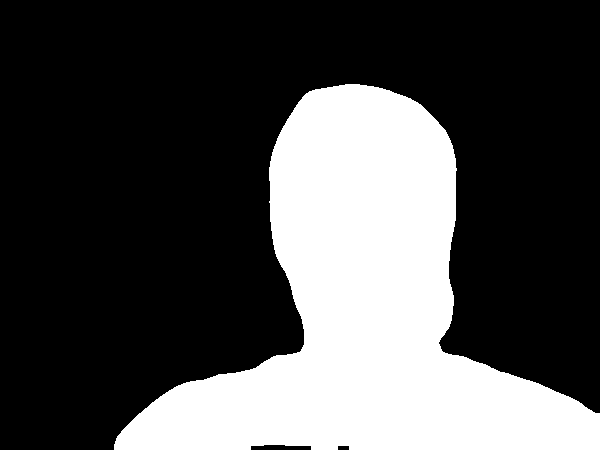

Mask con Blur


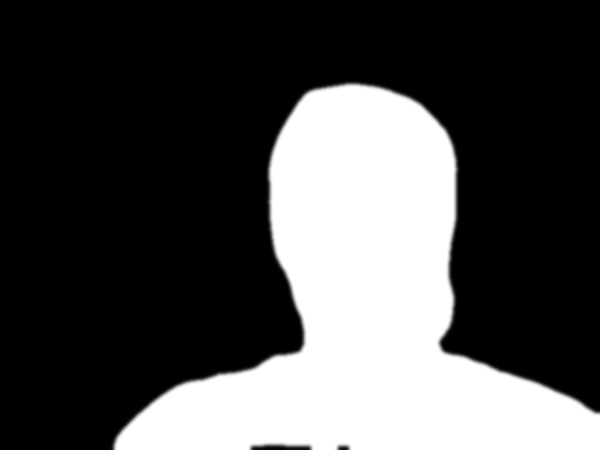

Erosion + Dilation


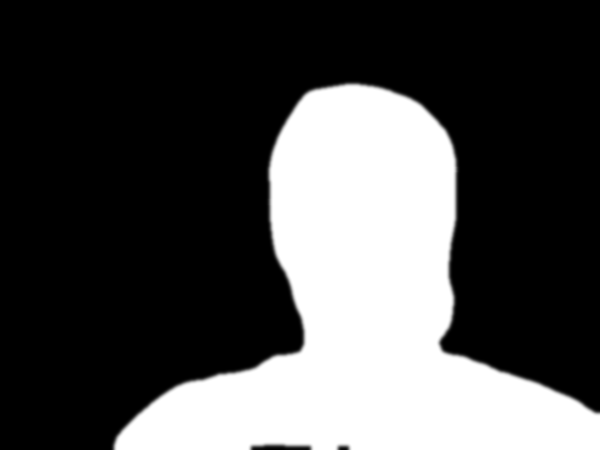

alpha


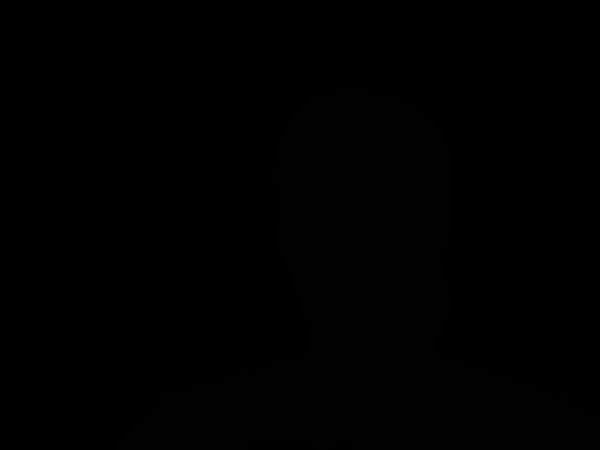

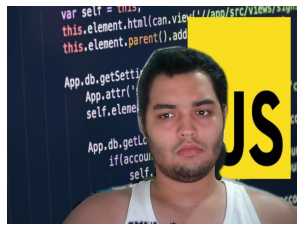

In [ ]:
#Replace Background
segment(dlab, './hector.png', show_orig=True, virtual=True) 

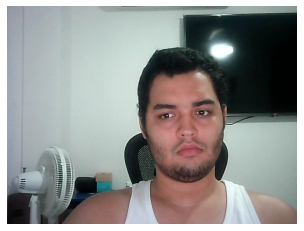

esto es om lo de la prediction


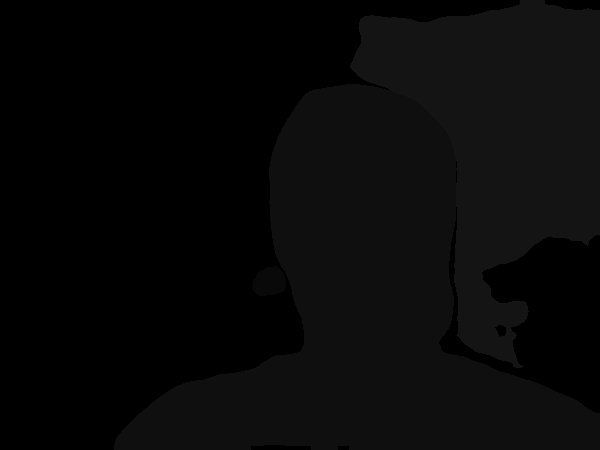

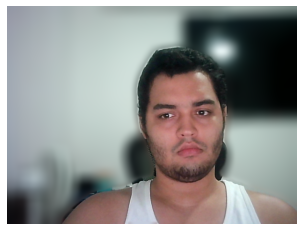

In [ ]:
#Blur real Background
segment(dlab, './hector.png', show_orig=True, blur=True) 